# Tipping Behavior Analysis
This notebook analyzes tipping behavior in the restaurant based on the data provided in the assignment

In [11]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load the dataset
data = pd.read_csv('tips.csv') 
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Data Exploration
Let's explore the dataset to understand its structure and the relationships between variables.

In [13]:
# Summary statistics
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
# Check for missing values
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Visualizations
We will create visualizations to understand the relationships between the total bill and tips.

In [15]:
# Encoding categorical variables using LabelEncoder for regression analysis
label_encoder = LabelEncoder()

data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['day'] = label_encoder.fit_transform(data['day'])
data['time'] = label_encoder.fit_transform(data['time'])

data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


### Scatter plot

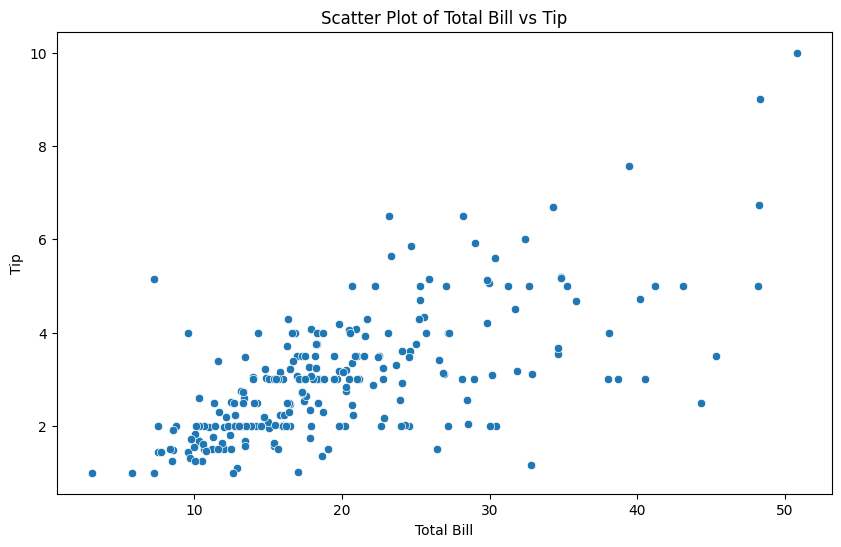

In [16]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

### Pair plot

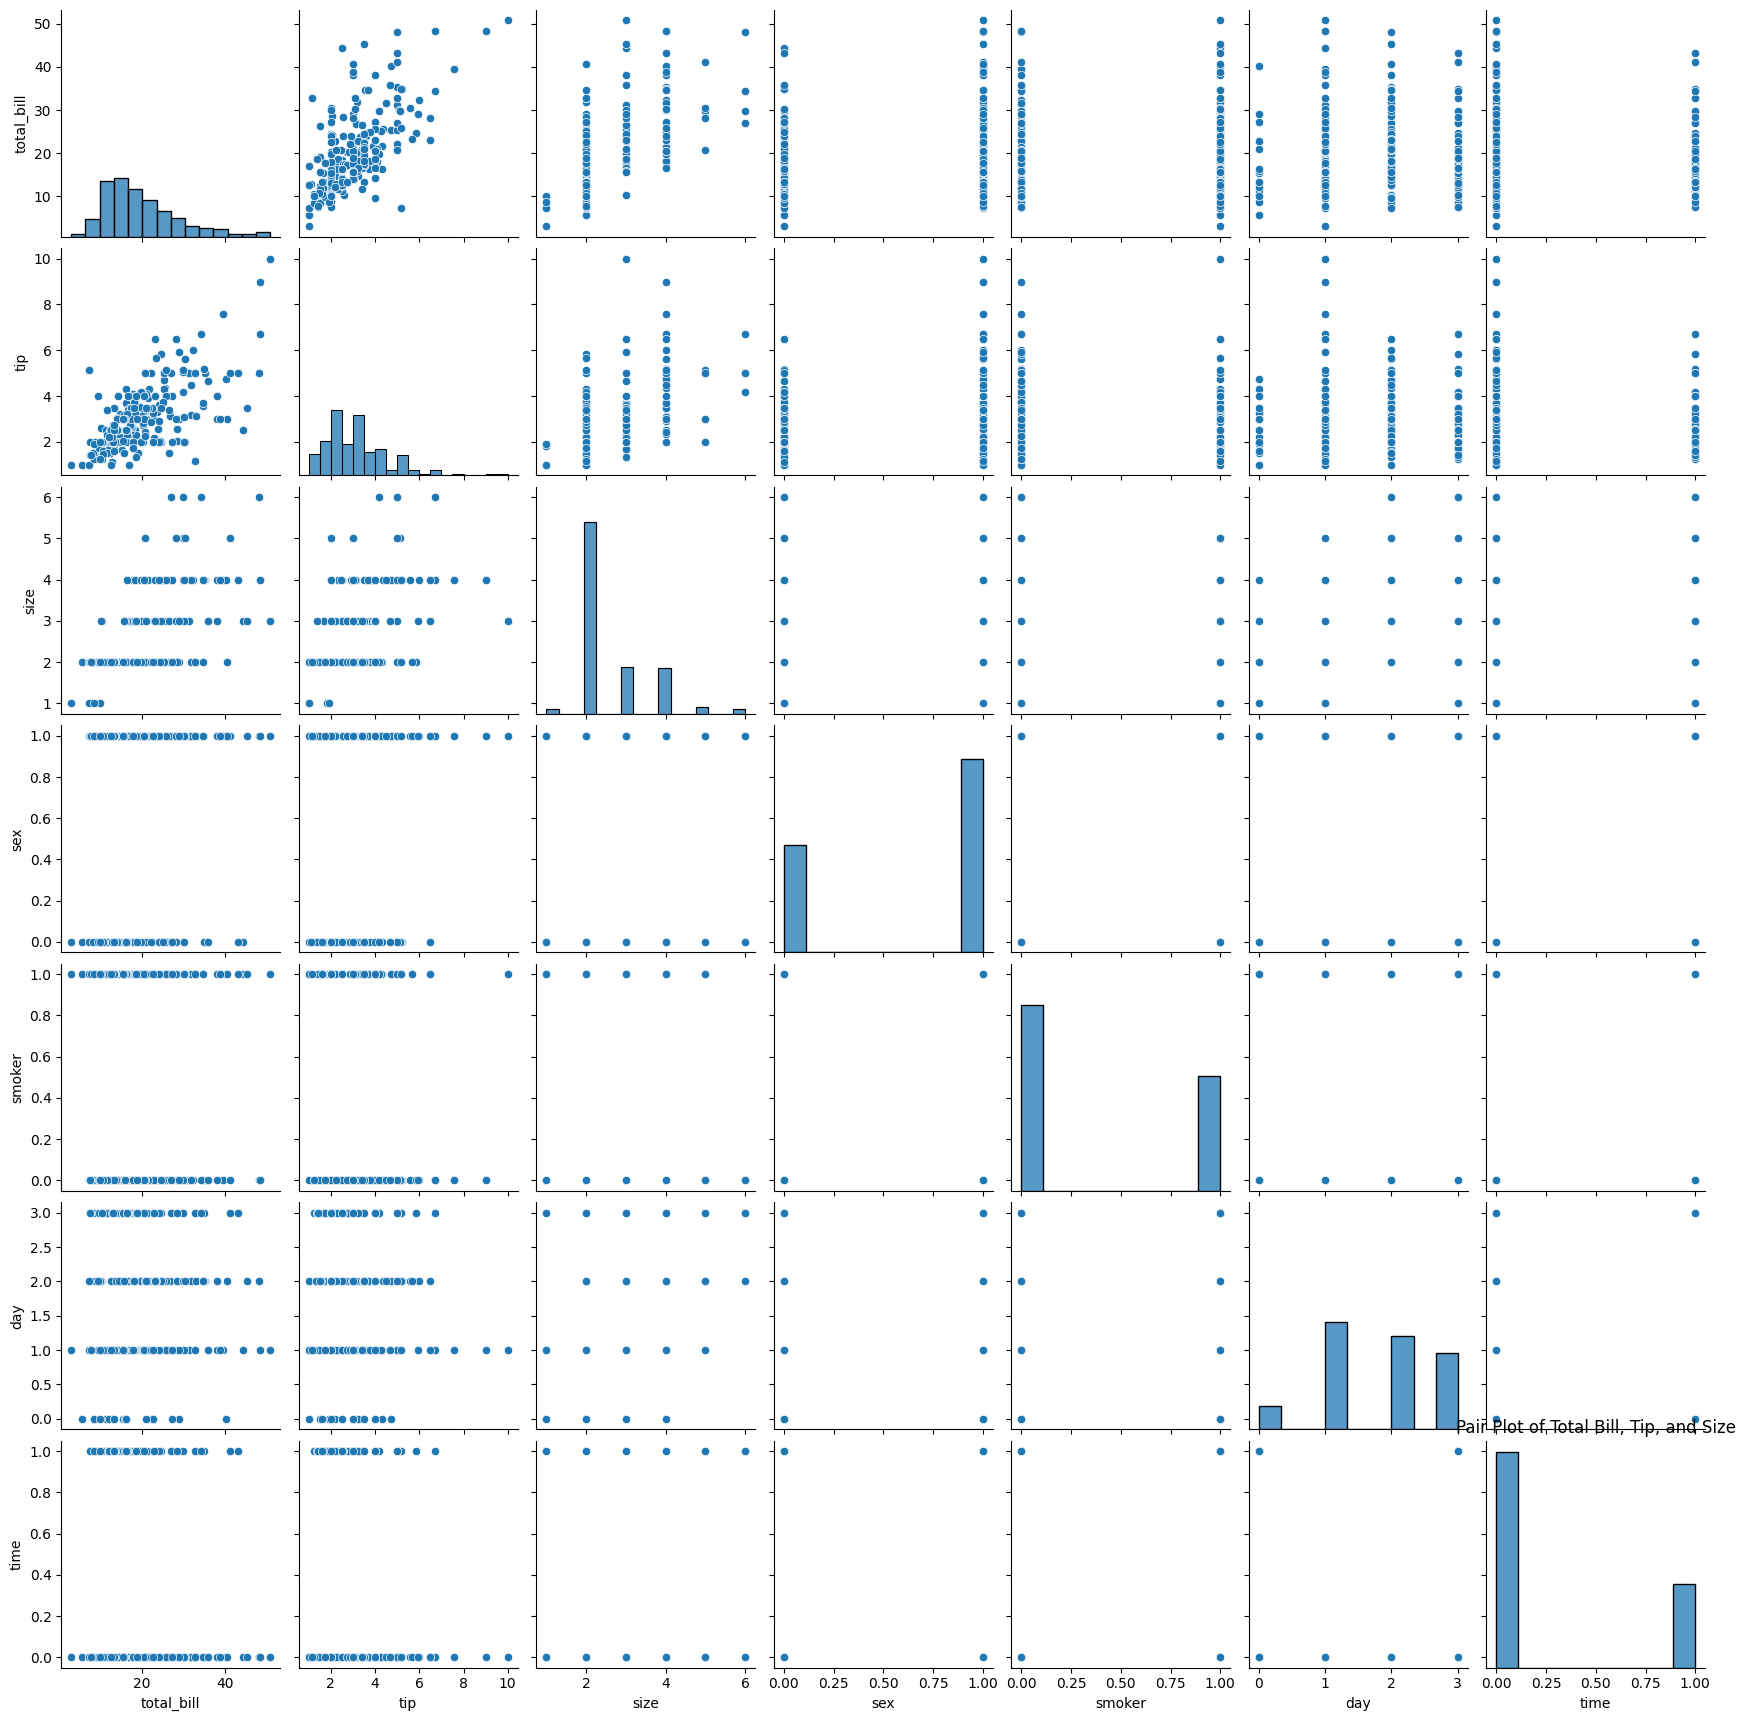

In [17]:
# Pair Plot
sns.pairplot(data, vars=['total_bill', 'tip', 'size', 'sex', 'smoker', 'day', 'time'])
plt.title('Pair Plot of Total Bill, Tip, and Size')
plt.show()

### Correlation Matrix

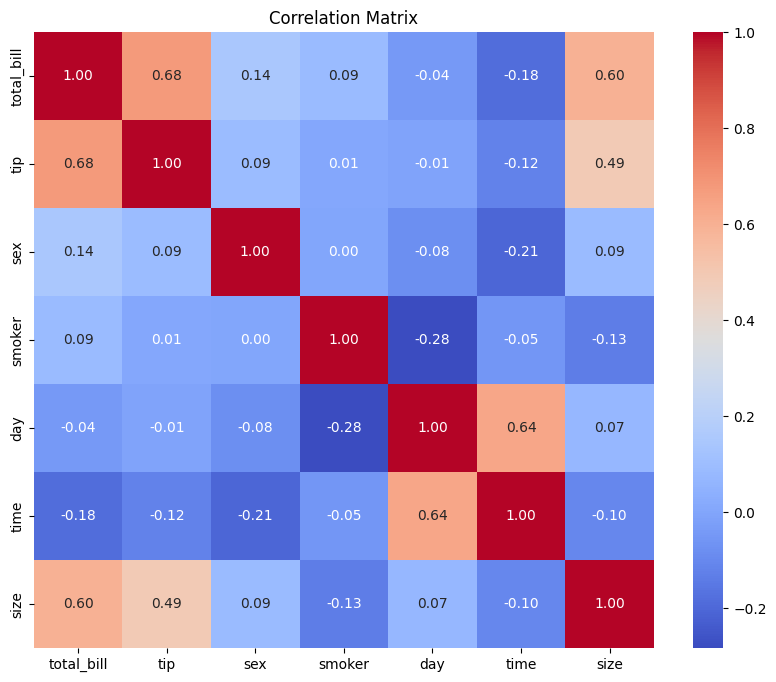

In [18]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Residual Plot

In [19]:
# define a OLS model

X = data[['total_bill', 'size'] + [col for col in data.columns if 'sex_' in col or 'smoker_' in col or 'day_' in col or 'time_' in col]]
y = data['tip']
X = sm.add_constant(X)  # Add constant for intercept
model = sm.OLS(y, X).fit()

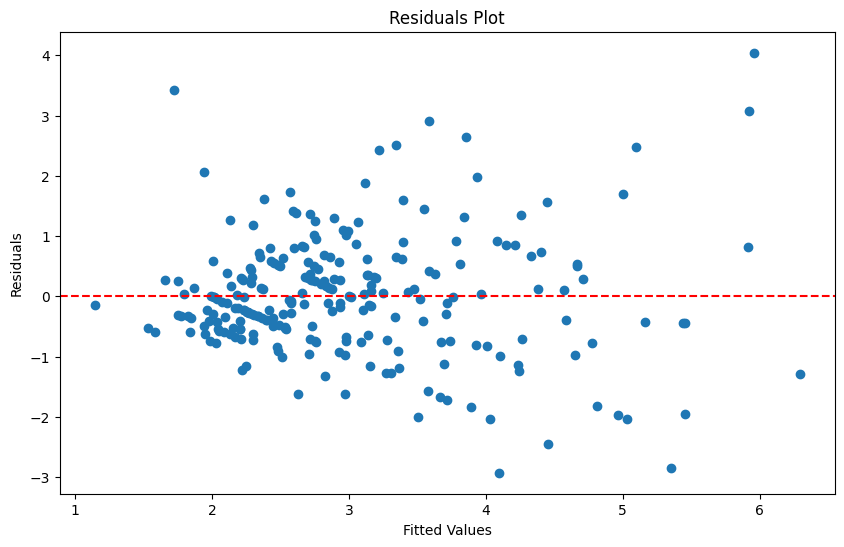

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## Regression Models
We will implement various regression models to predict tips based on the total bill and other features.

In [21]:
# Prepare the data for modeling
X = data[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']]  # Features
y = data['tip']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Rainbow test

In [22]:
# Rainbow test for linearity

rainbow_test = linear_rainbow(model)
print(f'Rainbow Test Statistic: {rainbow_test[0]}, p-value: {rainbow_test[1]}')

Rainbow Test Statistic: 1.190265664683282, p-value: 0.17048935693447384


The p-value that we got is greater than 0.05, so we fail to reject the null hypothesis, hence we can conclude there is not enough evidence to suggest that the relationship between the predictors and the target variable (tip) is non-linear. So we can reasonably assume that a linear regression model is appropriate for our data.

### 1. Linear Regression
Let's start with a simple linear regression model.

In [23]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression MSE: {mse_linear:.2f}, R^2: {r2_linear:.2f}')

Linear Regression MSE: 0.69, R^2: 0.44


### 2. Ridge Regression
Now, let's apply Ridge regression.

In [24]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge:.2f}, R^2: {r2_ridge:.2f}')

Ridge Regression MSE: 0.69, R^2: 0.45


### 3. Lasso Regression
Next, we will implement Lasso regression.

In [25]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mse_lasso:.2f}, R^2: {r2_lasso:.2f}')

Lasso Regression MSE: 0.57, R^2: 0.55


### 4. Decision Tree Regression
Now, let's use a decision tree regressor.

In [26]:
# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f'Decision Tree Regression MSE: {mse_tree:.2f}, R^2: {r2_tree:.2f}')

Decision Tree Regression MSE: 1.41, R^2: -0.13


### 5. Random Forest Regression
Next, we will implement a random forest regressor.

In [27]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regression MSE: {mse_rf:.2f}, R^2: {r2_rf:.2f}')

Random Forest Regression MSE: 0.97, R^2: 0.22


### 6. Support Vector Regression (SVR)
Now, let's apply Support Vector Regression.

In [28]:
# Support Vector Regression
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'Support Vector Regression MSE: {mse_svr:.2f}, R^2: {r2_svr:.2f}')

Support Vector Regression MSE: 0.68, R^2: 0.45


### 7. K-Nearest Neighbors (KNN)
Finally, we will implement K-Nearest Neighbors regression.

In [29]:
# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'KNN Regression MSE: {mse_knn:.2f}, R^2: {r2_knn:.2f}')

KNN Regression MSE: 0.84, R^2: 0.33


## Identifying which factors impact tip amounts

In [30]:
# Identify significant factors impacting tip amounts using OLS regression
X_ols = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_ols).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     26.26
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.38e-22
Time:                        12:14:11   Log-Likelihood:                -286.46
No. Observations:                 195   AIC:                             586.9
Df Residuals:                     188   BIC:                             609.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6169      0.308      2.001      0.0

## Conclusion
Rainbow test and visualization of plot suggested that linear regression should be good enough for the given data. The p-values from regression analysis suggest that total_bill and size are significant but other factors are not very significant. R^2 value of 0.456 suggests that only 45.6% variability in the tips can be explained via this model,which means there is a huge scope of improvement in the model. If the restaurant can attract people in bigger groups or get them to increase their bill, they can see more tips according to the model but sex, smoking status, day and time don't really affect the tips much.